In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=False)
calibrator.create_all_teams()
calibrator.process_data(verbose=True)
teams=calibrator.teams
calibrator.get_current_results('BPL').tail(10)

calibration.pkl  exists.
file exists, loading
2194


,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17824,2019-02-02,BPL,Crystal Palace,Fulham,2,0,2.17,0.60,1.54,0.90
17827,2019-02-02,BPL,Brighton and Hove Albion,Watford,0,0,2.14,0.33,2.15,0.84
17828,2019-02-02,BPL,Chelsea,Huddersfield Town,5,0,3.15,0.35,3.56,0.56
17843,2019-02-02,BPL,Burnley,Southampton,1,1,2.27,0.82,1.64,1.13
17855,2019-02-02,BPL,Everton,Wolverhampton,1,3,1.21,1.64,1.29,0.57
17869,2019-02-02,BPL,Cardiff City,AFC Bournemouth,2,0,2.21,0.47,0.97,2.19
17921,2019-02-03,BPL,Leicester City,Manchester United,0,1,1.89,1.31,2.11,0.96
17932,2019-02-03,BPL,Manchester City,Arsenal,3,1,2.83,0.64,2.64,0.60
17960,2019-02-04,BPL,West Ham United,Liverpool,1,1,1.07,1.35,1.01,2.05
17980,2019-02-06,BPL,Everton,Manchester City,0,2,0.13,2.94,0.71,2.11


In [3]:
print(calibrator.raw_data['League'].unique())
calibrator.raw_data.loc[calibrator.raw_data['League']=='ELC'];

['FL1' 'BPL' 'SPD' 'ISA' 'GB' 'UCL' 'MPDTC' 'MLS' 'SA' 'NT' 'NWSL' 'BSA'
 'RPL' 'MPDTA' 'ATB' 'SRSL' 'FL2' 'G2B' 'ELC' 'SP' 'PL' 'DE' 'TTSL' 'SSD'
 'ISB' 'APD' 'UEL' 'USL' 'DS' 'BJL' 'CSL' 'JJL' 'ELO' 'SAAPL' 'ELT' 'GSL'
 'AA']


In [4]:
Teams=dict()
League=dict()

In [5]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if x in ['FL1', 'BPL', 'SPD', 'ISA', 'GB', 'DE', 'PL', 'RPL']}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2,nr_degr=4)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
GB,0,26.5,19,34,5,1,44.44,73.92,5.31,0.32,6.06,3.6108
SPD,0,25.9,18,34,5,1,37.92,69.06,4.40,0.26,8.12,3.2560
BPL,0,19.7,12,28,8,1,6.25,18.28,3.43,0.32,43.49,2.3324
ISA,0,19.2,11,27,8,2,4.87,15.30,3.08,0.30,48.13,2.1560
PL,0,18.0,10,26,8,2,3.29,11.19,3.46,0.37,58.94,2.1798
DE,0,15.8,8,24,8,2,1.47,5.31,4.08,0.51,75.14,1.9992
RPL,0,15.6,8,23,8,3,1.10,4.30,3.39,0.44,76.13,1.8984
FL1,0,14.3,7,22,8,3,0.66,2.64,3.56,0.50,83.99,1.7800


In [6]:
country='BPL'
lH,pH=calibrator.teams[country+'Home'].means()
lA,pA=calibrator.teams[country+'Away'].means()
home_advantage=np.array([lH-lA,pH/pA])
home_advantage=np.array([0,1])
#home_advantage=[0,1]
print(home_advantage)
Teams[country]= calibrator.get_teams_for_league(country)
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=4)
League[country].process_current_results(calibrator.get_current_results(country))
League[country].simulate_season(n_scenarios=100000)
League[country].season_report()

[0 1]
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,62,93.4,87,99,2,1,67.06,100.00,5.39,0.18,0.00
Manchester City,62,90.7,84,96,3,1,32.06,100.00,6.42,0.25,0.00
Tottenham Hotspur,57,81.9,75,89,4,2,0.87,97.53,4.84,0.29,0.00
Chelsea,50,72.2,65,79,6,3,0.00,44.78,4.07,0.31,0.00
Manchester United,48,70.6,63,78,6,4,0.00,28.25,4.94,0.40,0.00
Arsenal,47,70.5,63,78,6,4,0.00,29.33,4.97,0.44,0.00
Wolverhampton,38,58.2,51,66,9,6,0.00,0.12,3.38,0.37,0.00
Watford,34,50.7,44,58,13,7,0.00,0.00,3.24,0.42,0.00
Leicester City,32,49.9,43,57,14,7,0.00,0.00,2.84,0.36,0.00
AFC Bournemouth,33,49.3,42,57,14,8,0.00,0.00,3.55,0.50,0.01


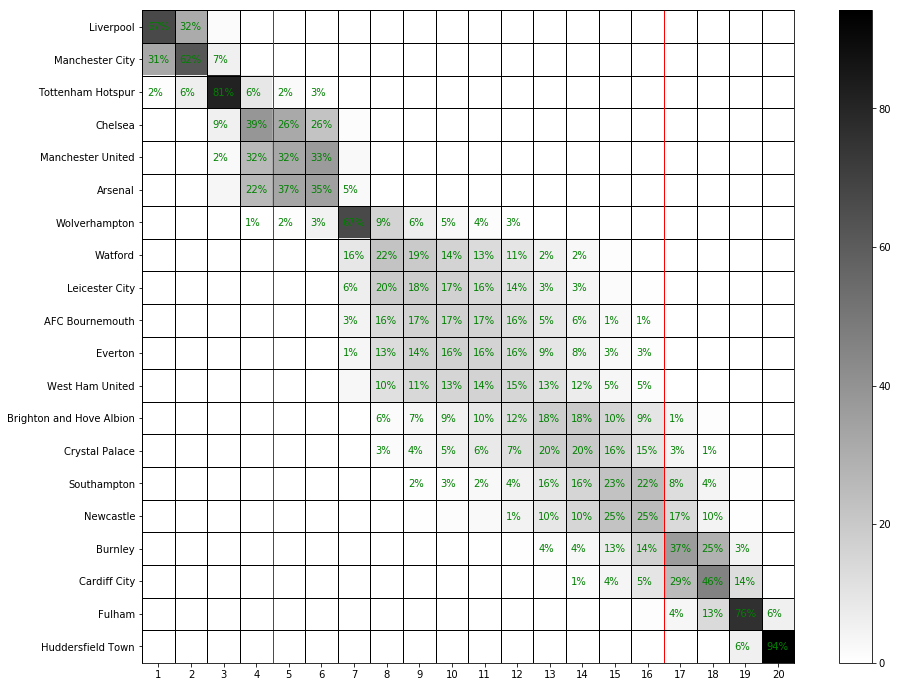

In [7]:
League['BPL'].probability_grid()

In [59]:
home=[teams['Fulham'],teams['Crystal Palace'],teams['Huddersfield Town'],teams['Liverpool'],teams['Southampton']
     ,teams['Watford'],teams['Brighton and Hove Albion']]
away = [teams['Manchester United'],teams['West Ham United'],teams['Arsenal'],teams['AFC Bournemouth'],
       teams['Cardiff City'],teams['Everton'],teams['Burnley']]
hg=0
ag=0
for h,a in zip(home,away):
    res=h.vs(a,n=int(1e6))
    hg+=res[0]
    ag+=res[1]
np.bincount(hg).argmax(),np.bincount(ag).argmax(),np.bincount(hg+ag).argmax()

(9, 10, 20)

In [60]:
PremierLeague=League['BPL']
team_name='Manchester United'
ind = np.ones(PremierLeague.place_per_team.shape[1]).astype(bool)
match_id = PremierLeague.matches_to_sim['Arsenal v Manchester United']['id']
ind = ind&(PremierLeague.simulated_home_goals[match_id]<PremierLeague.simulated_away_goals[match_id])
match_id = PremierLeague.matches_to_sim['Manchester United v Chelsea']['id']
ind = ind &( PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])

#ind = np.ones(PremierLeague.place_per_team.shape[1]).astype(bool)
match_id = PremierLeague.matches_to_sim['Manchester City v Chelsea']['id']
#ind = ind & ( PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])
match_id = PremierLeague.matches_to_sim['Fulham v Manchester United']['id']
#ind = ind & ( PremierLeague.simulated_home_goals[match_id]<PremierLeague.simulated_away_goals[match_id])
#ind = ind &(PremierLeague.place_per_team[PremierLeague.team_id['Liverpool'],:]>1)
#ind = ind &(PremierLeague.place_per_team[PremierLeague.team_id['Manchester United'],:]<=4)


print(100*ind.sum()/ind.size)
PremierLeague.season_report(ind=ind)


15.162


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,62,93.4,87,99,2,1,66.84,100.00,5.39,0.18,0.00
Manchester City,62,90.7,85,96,3,1,32.23,100.00,6.42,0.25,0.00
Tottenham Hotspur,57,81.9,75,89,4,2,0.93,97.27,4.84,0.29,0.00
Manchester United,48,73.8,67,80,6,3,0.01,59.73,4.94,0.40,0.00
Chelsea,50,70.7,64,78,6,4,0.00,26.39,4.07,0.31,0.00
Arsenal,47,69.2,62,76,6,4,0.00,16.51,4.97,0.44,0.00
Wolverhampton,38,58.2,51,66,10,6,0.00,0.11,3.38,0.37,0.00
Watford,34,50.7,44,58,13,7,0.00,0.00,3.24,0.42,0.00
Leicester City,32,49.9,43,57,14,7,0.00,0.00,2.84,0.36,0.01
AFC Bournemouth,33,49.4,42,57,14,8,0.00,0.00,3.55,0.50,0.01


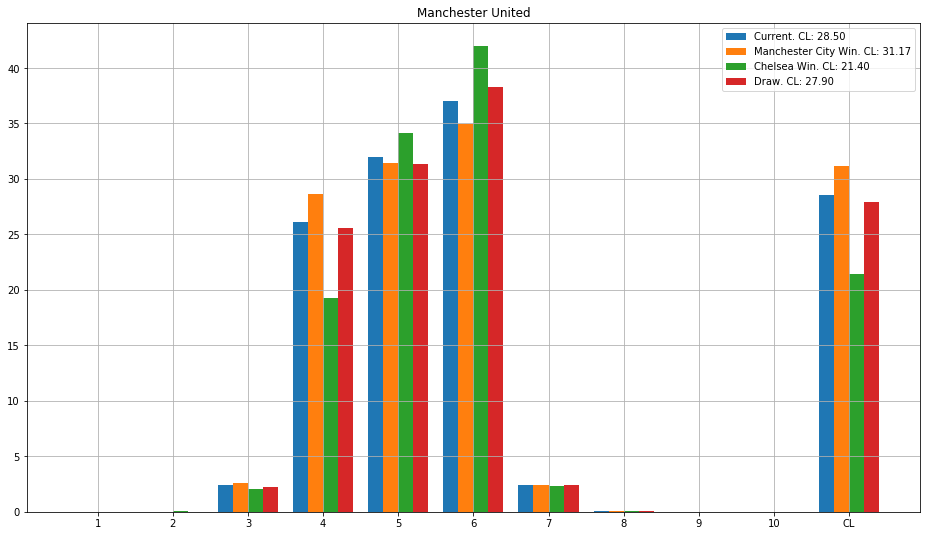

In [61]:
PremierLeague=League['BPL']
_,fig=PremierLeague.what_if(PremierLeague.matches_to_sim['Manchester City v Chelsea'],ref_team=teams['Manchester United'])

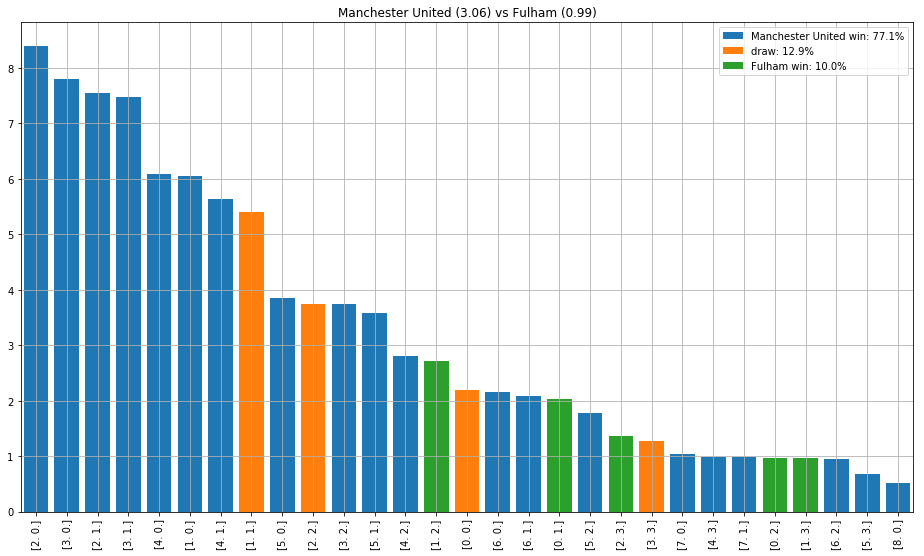

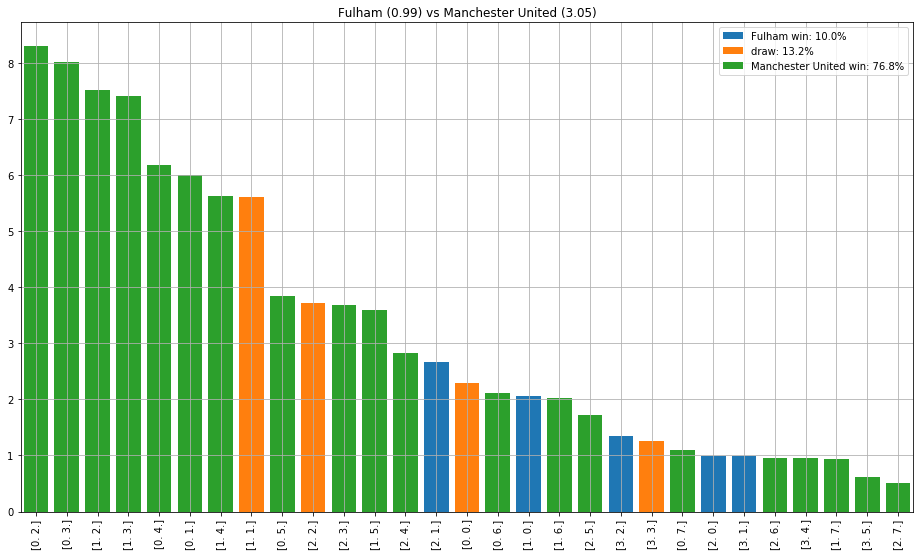

In [64]:
team1=teams['Manchester United']
#team1=teams['Manchester City']
team2=teams['Brighton and Hove Albion']
team2=teams['Chelsea']
team2=teams['Fulham']
#team2=teams['Leicester City']
fig=plt.figure(1)
home_advantage=np.array([lH-lA,pH/pA])
home_advantage=np.array([0,1])
team1.outcomes_vs(team2,home_advantage=home_advantage)
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=home_advantage)
fig = plt.gcf()
fig.set_size_inches(16,9)

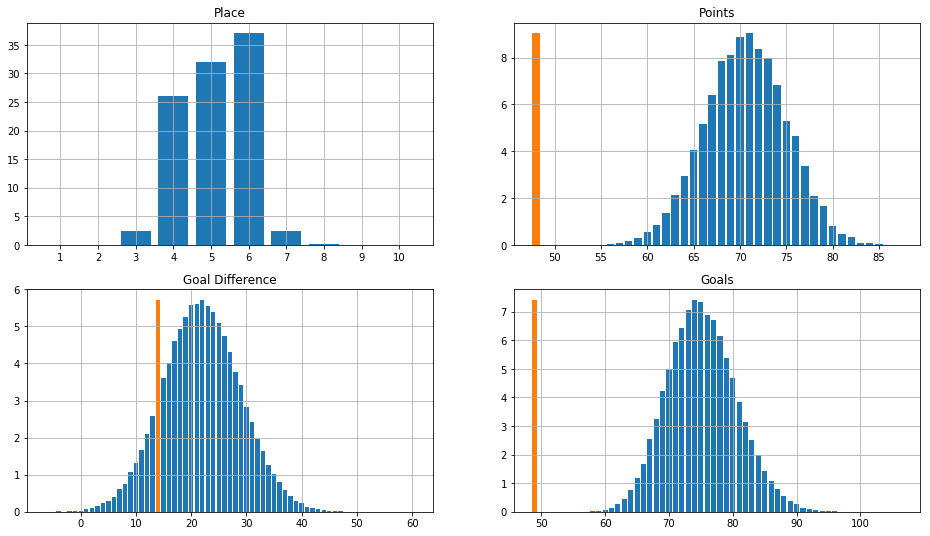

In [65]:
PremierLeague=League['BPL']
PremierLeague.team_report(teams['Manchester United'])

# Most important matches

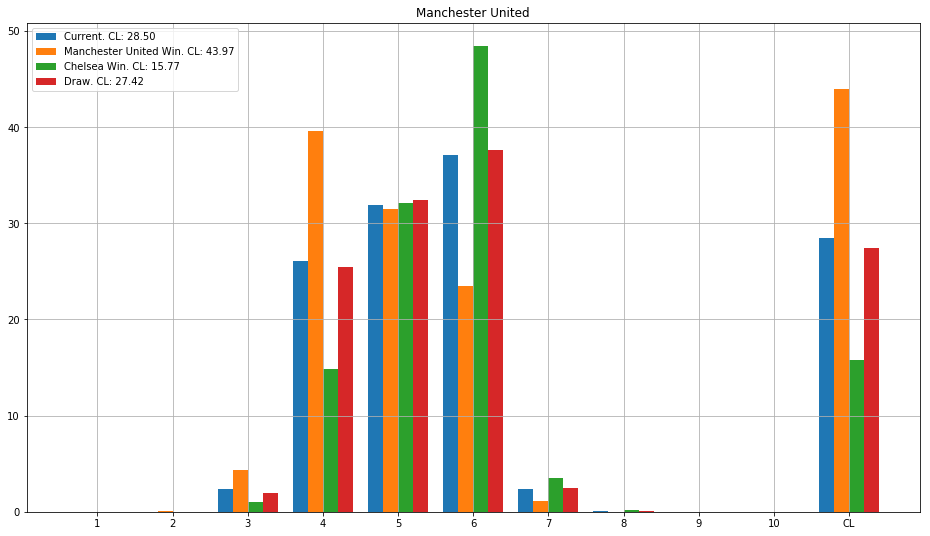

In [76]:
imp=[]
ref_team=teams['Manchester United']
# ref_team='Liverpool'
# ref_team='Arsenal'
matches=[]
PremierLeague=League['BPL']
for x,_match_to_sim in PremierLeague.matches_to_sim.items():
    matches.append(x)
    pcl,_=PremierLeague.what_if(_match_to_sim,ref_team=ref_team,show_plot=False,place=4,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    #imp.append(pcl.std())
    imp.append(np.abs(pcl[1:-1]-pcl[0]).mean())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
pcl,fig=PremierLeague.what_if(PremierLeague.matches_to_sim[the_match],ref_team=ref_team)

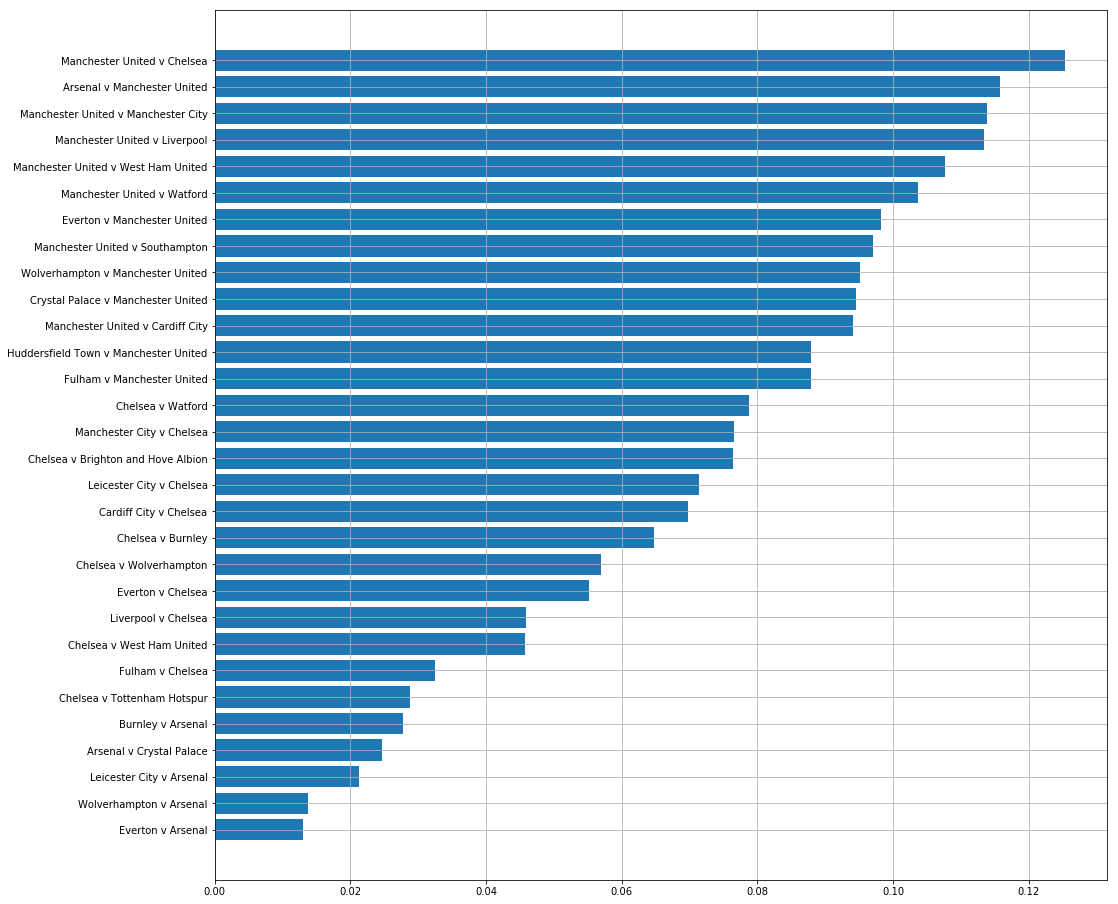

In [87]:
i_sort=(imp).argsort()
#matches=matches[i_sort]
#imp=imp[i_sort]
xx=np.arange(30)
plt.barh(xx,imp[i_sort][xx])
plt.yticks(xx,matches[i_sort][-xx.size:],rotation=0);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,16)

1.7373715384615385

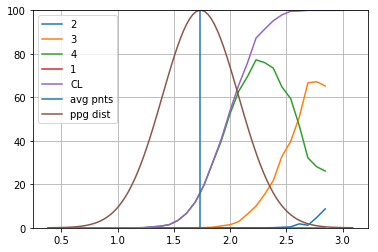

In [88]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    
ind = np.isnan(p[:,3])
p[ind,3]=np.interp(nrpnts[ind],nrpnts[~ind],p[~ind,3])

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
mu=pnts.mean()/n
plt.axvline(mu,label='avg pnts')
s=(pnts/n).std()
from scipy.stats import norm
x=np.linspace(mu-4*s,mu+4*s,100)
y=norm.pdf((x-mu)/s)
y=100*y/y.max()
plt.plot(x,y,label='ppg dist')
plt.legend()
pnts.mean()/n

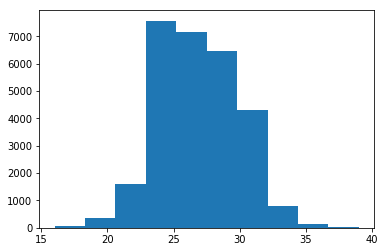

In [89]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
ind=PremierLeague.place_per_team[i,:]<=4
plt.hist((PremierLeague.points_per_team[i,ind]-PremierLeague.current_points[team_name]),10);

In [90]:
def points(x):
    return 3*x[0]+x[1]

def prob(x):
    return np.round(100*np.interp(points(x),nrpnts,p[:,3]),2)
    

[(nW,nD,n-nW-nD,points((nW,nD)),prob((nW,nD))) for nW in range(n+1) for nD in range(n+1) if n-nW-nD>=0 and prob((nW,nD))>=90]

[(9, 3, 1, 30, 91.37),
 (9, 4, 0, 31, 95.24),
 (10, 0, 3, 30, 91.37),
 (10, 1, 2, 31, 95.24),
 (10, 2, 1, 32, 97.93),
 (10, 3, 0, 33, 99.57),
 (11, 0, 2, 33, 99.57),
 (11, 1, 1, 34, 99.7),
 (11, 2, 0, 35, 100.0),
 (12, 0, 1, 36, 100.0),
 (12, 1, 0, 37, 100.0),
 (13, 0, 0, 39, 100.0)]